In [1]:
#Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

#import requests library
import requests

#import API key
from config import weather_api_key

In [2]:
#Create a set of random lat/lon combinations
lats=np.random.uniform(-90,90,1500)
lngs=np.random.uniform(-180,180,1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
#add  lat and lng to a list
coordinates=list(lat_lngs)

In [4]:
#Create a list for cities
cities=[]

#Identify nearest city for each lat/lng combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If city is unique, add to city list
    if city not in cities:
        cities.append(city)

#print city count        
len(cities)

622

In [5]:
#starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
#create empty list for weather data
city_data=[]

#Print beginning of logging
print("Beginning Data Retrieval.    ")
print("-----------------------------")

#create counters
record_count=1
set_count=1



Beginning Data Retrieval.    
-----------------------------


In [7]:
# Loop through all cities
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging
    if (i % 50 ==0 and i >=50):
        set_count +=1
        record_count=1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url=url+"&q="+city.replace(" ","+")
    
    #Log the URL, record and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to record count
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | kibala
Processing Record 4 of Set 1 | ripky
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | krasnyy chikoy
Processing Record 7 of Set 1 | sioux lookout
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | changji
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | miyako
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | malanville
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | chickasha
Processing Record 20 of Set 1 | sorland
Processing Record 21 of Set 1 | kailua
Processing Record 22 of Set 1 | camacha
Processing Record 23 of Set 1 | san juan
Processing Record 24 of Set 1 | albany
Processing Record 

Processing Record 42 of Set 4 | aranos
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | bargal
City not found. Skipping...
Processing Record 46 of Set 4 | newport
Processing Record 47 of Set 4 | ushtobe
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | douentza
Processing Record 50 of Set 4 | fukuma
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | merritt island
Processing Record 3 of Set 5 | big bend
Processing Record 4 of Set 5 | tonj
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | skelleftea
Processing Record 7 of Set 5 | suzu
City not found. Skipping...
Processing Record 8 of Set 5 | ingraj bazar
Processing Record 9 of Set 5 | manokwari
Processing Record 10 of Set 5 | dikson
Processing Record 11 of Set 5 | ayr
Processing Record 12 of Set 5 | guanica
Processing Record 13 of Set 5 | la primavera
Processing Record 14 of Set 5 | arinos
Processing Reco

Processing Record 34 of Set 8 | dubai
Processing Record 35 of Set 8 | gold coast
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | chagda
City not found. Skipping...
Processing Record 38 of Set 8 | calabazar de sagua
Processing Record 39 of Set 8 | oxapampa
Processing Record 40 of Set 8 | smoky lake
Processing Record 41 of Set 8 | hun
Processing Record 42 of Set 8 | vittoria
Processing Record 43 of Set 8 | swan hill
Processing Record 44 of Set 8 | mitsamiouli
Processing Record 45 of Set 8 | la palma
Processing Record 46 of Set 8 | bonavista
Processing Record 47 of Set 8 | byron bay
Processing Record 48 of Set 8 | mtimbira
Processing Record 49 of Set 8 | namatanai
Processing Record 50 of Set 8 | kirakira
Processing Record 1 of Set 9 | mana
Processing Record 2 of Set 9 | gigmoto
Processing Record 3 of Set 9 | samusu
City not found. Skipping...
Processing Record 4 of Set 9 | mantua
Processing Record 5 of Set 9 | sur
Processing Record 6 of Set 9 | hami
Processing Recor

Processing Record 19 of Set 12 | kaeo
Processing Record 20 of Set 12 | westport
Processing Record 21 of Set 12 | tevaitoa
Processing Record 22 of Set 12 | champerico
Processing Record 23 of Set 12 | ulaangom
Processing Record 24 of Set 12 | ahero
Processing Record 25 of Set 12 | chimbote
Processing Record 26 of Set 12 | pringsewu
Processing Record 27 of Set 12 | amalapuram
Processing Record 28 of Set 12 | chara
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | shimanovsk
Processing Record 31 of Set 12 | berezovyy
Processing Record 32 of Set 12 | half moon bay
Processing Record 33 of Set 12 | monrovia
Processing Record 34 of Set 12 | fort nelson
Processing Record 35 of Set 12 | tulu bolo
Processing Record 36 of Set 12 | genhe
Processing Record 37 of Set 12 | santa cruz del sur
Processing Record 38 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 12 | adzope
Processing Record 40 of Set 12 | harnai
Processing Record 41 of Set 12 | hendek

In [25]:
#convert array into df
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,70.92,80,98,10.07,EC,2021-11-28 19:00:51
1,Hilo,19.7297,-155.0900,75.88,72,0,10.42,US,2021-11-28 18:56:39
2,Kibala,9.1104,18.3463,81.93,20,99,4.41,TD,2021-11-28 19:00:52
3,Ripky,51.8010,31.0838,41.23,93,100,10.63,UA,2021-11-28 19:00:52
4,Port Alfred,-33.5906,26.8910,66.18,81,9,5.66,ZA,2021-11-28 19:00:52
5,Krasnyy Chikoy,50.3643,108.7512,10.51,93,100,0.85,RU,2021-11-28 19:00:53
6,Sioux Lookout,50.1001,-91.9170,23.38,82,100,8.08,CA,2021-11-28 19:00:53
7,Alofi,-19.0595,-169.9187,77.16,64,53,18.92,NU,2021-11-28 19:00:53
8,Changji,44.0167,87.3167,14.79,85,0,0.00,CN,2021-11-28 19:00:54
9,Clyde River,70.4692,-68.5914,-3.77,84,100,16.11,CA,2021-11-28 19:00:54


In [26]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-11-28 19:00:51,-0.7393,-90.3518,70.92,80,98,10.07
1,Hilo,US,2021-11-28 18:56:39,19.7297,-155.0900,75.88,72,0,10.42
2,Kibala,TD,2021-11-28 19:00:52,9.1104,18.3463,81.93,20,99,4.41
3,Ripky,UA,2021-11-28 19:00:52,51.8010,31.0838,41.23,93,100,10.63
4,Port Alfred,ZA,2021-11-28 19:00:52,-33.5906,26.8910,66.18,81,9,5.66
5,Krasnyy Chikoy,RU,2021-11-28 19:00:53,50.3643,108.7512,10.51,93,100,0.85
6,Sioux Lookout,CA,2021-11-28 19:00:53,50.1001,-91.9170,23.38,82,100,8.08
7,Alofi,NU,2021-11-28 19:00:53,-19.0595,-169.9187,77.16,64,53,18.92
8,Changji,CN,2021-11-28 19:00:54,44.0167,87.3167,14.79,85,0,0.00
9,Clyde River,CA,2021-11-28 19:00:54,70.4692,-68.5914,-3.77,84,100,16.11


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

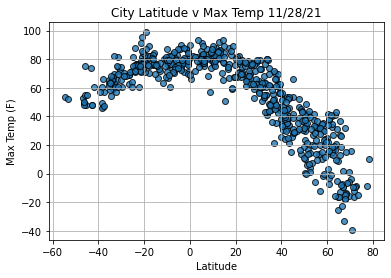

In [32]:
#Build scatter plot
plt.scatter(lats,max_temps,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Max Temp "+time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_MaxTemp.png")

#Show plot
plt.show()

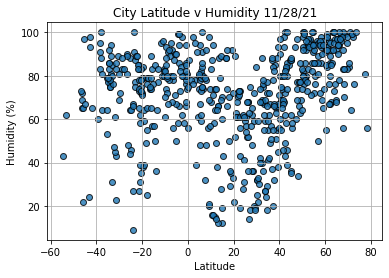

In [35]:
#Build scatter plot for humidity
plt.scatter(lats,humidity,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_Humidity.png")

#Show plot
plt.show()

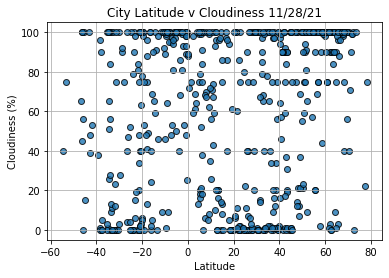

In [36]:
#Build scatter plot for Cloudiness
plt.scatter(lats,cloudiness,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_Cloudiness.png")

#Show plot
plt.show()

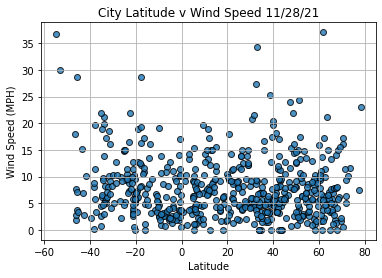

In [37]:
#Build scatter plot for Wind Speed
plt.scatter(lats,wind_speed,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_Wind Speed.png")

#Show plot
plt.show()